<a href="https://colab.research.google.com/github/aTrotier/COURS_RECO_BART/blob/main/cours_bart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Dans ce cours nous utiliserons [BART](https://mrirecon.github.io/bart/) qui est une librairie de fonction permettant de reconstruire les données IRM

La première étape et d'installer BART dans google colab : https://colab.research.google.com/

# Installation librairie

In [1]:
!apt-get -qq install -y  gcc make libfftw3-dev liblapacke-dev libpng-dev libopenblas-dev gfortran

Selecting previously unselected package libfftw3-long3:amd64.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../0-libfftw3-long3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-long3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-quad3:amd64.
Preparing to unpack .../1-libfftw3-quad3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-quad3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-single3:amd64.
Preparing to unpack .../2-libfftw3-single3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-single3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-bin.
Preparing to unpack .../3-libfftw3-bin_3.3.7-1_amd64.deb ...
Unpacking libfftw3-bin (3.3.7-1) ...
Selecting previously unselected package libfftw3-dev:amd64.
Preparing to unpack .../4-libfftw3-dev_3.3.7-1_amd64.deb ...
Unpacking libfftw3-dev:amd64 (3.3.7-1) ...
Selecting previously unselected package liblapacke:amd64.
Preparing to unpack .../5-liblapacke_

# Installation de BART à partir de github

In [2]:
!git clone https://github.com/mrirecon/bart

Cloning into 'bart'...
remote: Enumerating objects: 12248, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (294/294), done.
remote: Total 12248 (delta 272), reused 303 (delta 188), pack-reused 11765
Receiving objects: 100% (12248/12248), 7.88 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (8883/8883), done.


Checkout vers version 0.7



In [9]:
!cd /content/bart
!git checkout v0.7.00

HEAD is now at d1b0e57 bump version


**Compilation**

In [10]:
!PARALLEL=1 make

make MAKESTAGE=2 
make[1]: Entering directory '/content/bart'
CONFIGURATION MODIFIED. RUNNING FULL REBUILD.
touch isclean
make allclean || rm isclean
make[2]: Entering directory '/content/bart'
rm -f `find /content/bart/src -name "*.o"`
rm -f /content/bart/utests/*.o
rm -f  test_linop_matrix  test_linop  test_batchsvd  test_pattern  test_types  test_misc  test_moba  test_nlop  test_nufft  test_multind  test_flpmath  test_splines  test_linalg  test_polynom  test_window  test_conv  test_blas  test_mdfft  test_ops  test_ops_p  test_flpmath2  test_ode_bloch  test_biot_savart  test_signals  test_geom  test_iter  test_prox
rm -f /content/bart/lib/.*.lock
rm -f /content/bart/lib/*.a 
rm -f  bart  avg  bench  bin  bitmask  cabs  caldir  calmat  carg  casorati  cc  ccapply  cdf97  circshift  conj  conv  conway  copy  cpyphs  creal  crop  delta  ecalib  ecaltwo  estdelay  estdims  estshift  estvar  extract  fakeksp  fft  fftmod  fftrot  fftshift  filter  flatten  flip  fmac  homodyne  index  inv

In [17]:
!make install

make MAKESTAGE=2 install
make[1]: Entering directory '/content/bart'
install -d //usr/local//bin/
install bart //usr/local//bin/
install -d //usr/local//share/doc/bart/
install /content/bart/doc/*.txt /content/bart/README //usr/local//share/doc/bart/
install -d //usr/local//lib/bart/commands/
make[1]: Leaving directory '/content/bart'
install -d //usr/local//bin/
install bart //usr/local//bin/
install -d //usr/local//share/doc/bart/
install /content/bart/doc/*.txt /content/bart/README //usr/local//share/doc/bart/
install -d //usr/local//lib/bart/commands/


In [18]:
!bart

BART. Available commands are:
avg         bench       bin         bitmask     cabs        caldir      
calmat      carg        casorati    cc          ccapply     cdf97       
circshift   conj        conv        conway      copy        cpyphs      
creal       crop        delta       ecalib      ecaltwo     estdelay    
estdims     estshift    estvar      extract     fakeksp     fft         
fftmod      fftrot      fftshift    filter      flatten     flip        
fmac        homodyne    index       invert      itsense     join        
looklocker  lrmatrix    mandelbrot  mip         moba        mobafit     
nlinv       noise       normalize   nrmse       nufft       ones        
pattern     phantom     pics        pocsense    poisson     pol2mask    
poly        repmat      reshape     resize      rmfreq      rof         
roistat     rss         rtnlinv     sake        saxpy       scale       
sdot        show        signal      slice       spow        sqpics      
squeeze     ssa      

# Test utilisation BART avec Python

Préparation des fonctions pour être utilisées avec python

In [27]:
import os
import sys
import numpy as np

os.environ['TOOLBOX_PATH'] = '/content/bart'
path = os.environ["TOOLBOX_PATH"] + "/python/"
sys.path.append(path)

from bart import bart
import cfl

import matplotlib.pyplot as plt
%matplotlib inline

Generate a phantom with BART and plot the image

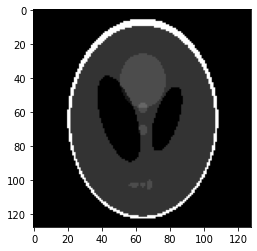

In [13]:
x = bart(1, 'phantom')
plt.figure()
plt.imshow(abs(x), cmap='gray')

# Utilisation bart

BART s'utilise en ligne de commande mais peut être utilisé gâce à un wrapper python (ce que l'on fera dans la suite de ce cours)

In [20]:
!bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-G ...] [-T ...] [-N d] [-B ...] [-x d] [-g d] [-3] [-b] [-r d] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S nc      	Output nc sensitivities
-k		k-space
-t file      	trajectory
-G		geometric object phantom
-T		tubes phantom
-N num      	Random tubes phantom and number
-B		BART logo
-x n      	dimensions in y and z
-g n=1,2      	select geometry for object phantom
-3		3D
-b		basis functions for geometry
-r seed      	random seed initialization
-h		help


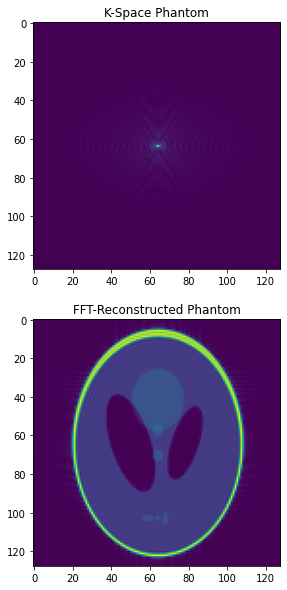

In [25]:
# Generating a k-space phantom and applying an inverse FFT.
shepp_kspace = bart(1, "phantom -k -x 128")
shepp_fft = bart(1, "fft -i 3", shepp_kspace)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))
ax[0].set_title("K-Space Phantom")
ax[0].imshow(abs(shepp_kspace))

ax[1].set_title("FFT-Reconstructed Phantom")
ax[1].imshow(abs(shepp_fft))

# Génération d'un mask pour sous-échantillonner dans une direction

(128, 128)

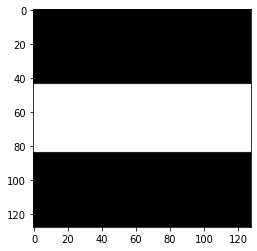

In [69]:
display(np.shape(shepp_kspace))

# mask pour garder que les lignes centrales du kspace
mask = np.zeros(np.shape(shepp_kspace))

kx1 = 44
kx2 = 84
mask[kx1:kx2,:]=np.ones(np.shape(mask[kx1:kx2,:]))

plt.figure()
plt.imshow(abs(mask), cmap='gray')

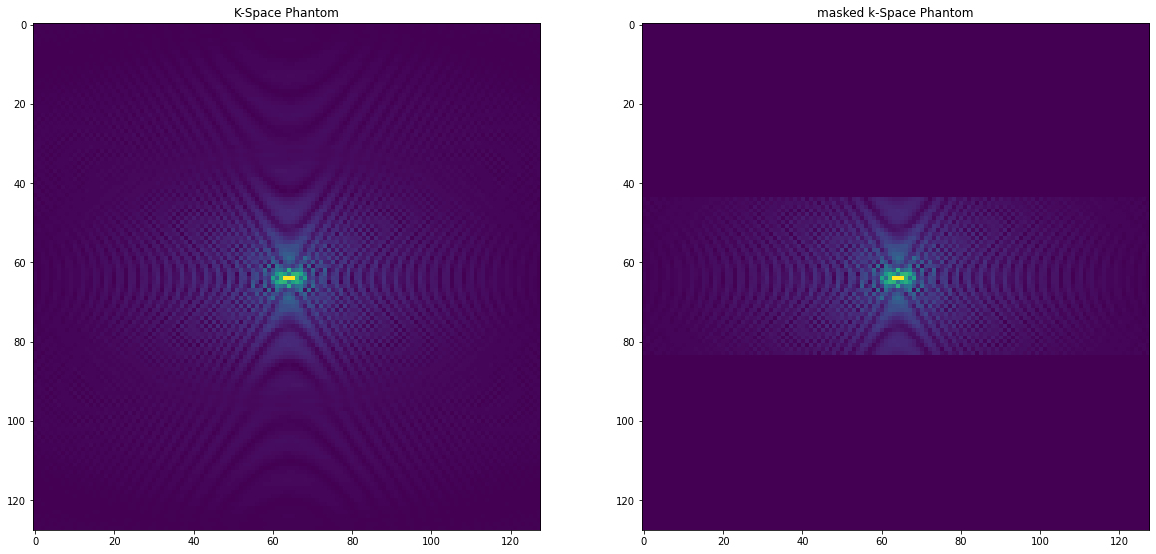

In [80]:
shepp_kspace_u = shepp_kspace * mask;

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("K-Space Phantom")
ax[0].imshow(abs(shepp_kspace),vmin=0, vmax=0.03)

ax[1].set_title("masked k-Space Phantom")
ax[1].imshow(abs(shepp_kspace_u),vmin=0, vmax=0.03)

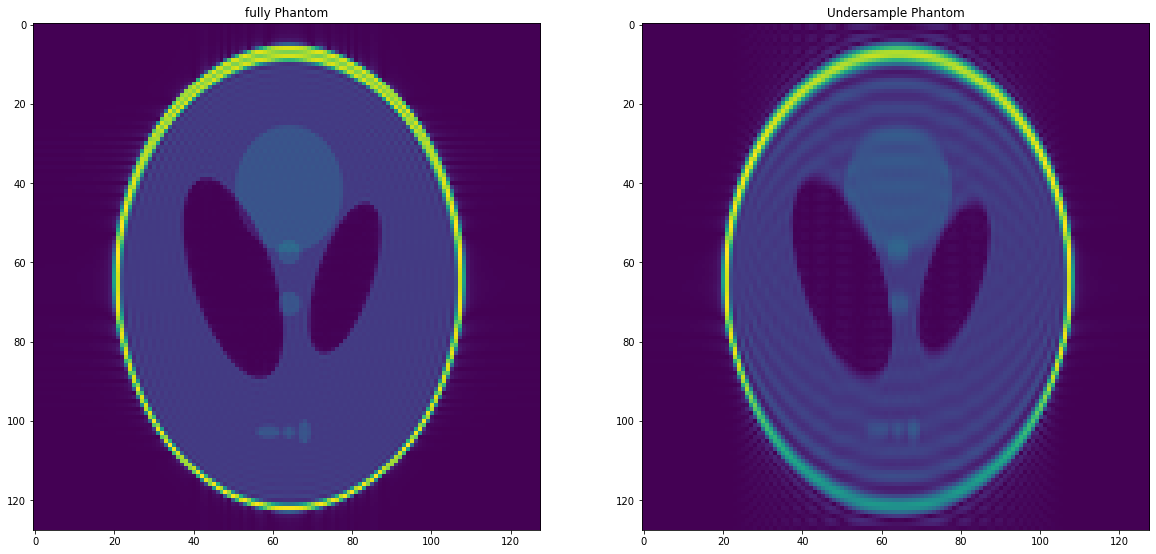

In [79]:
shepp_fft_u = bart(1, "fft -i 3", shepp_kspace_u)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully Phantom")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("Undersample Phantom")
ax[1].imshow(abs(shepp_fft_u))

# Zero-filling reconstruction

(256, 256)

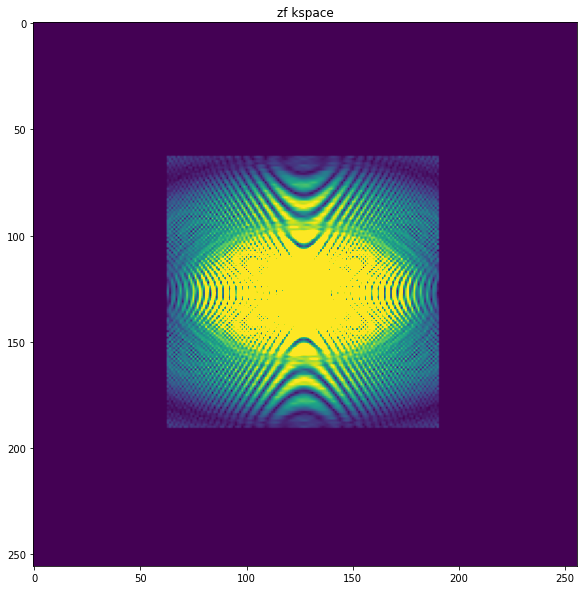

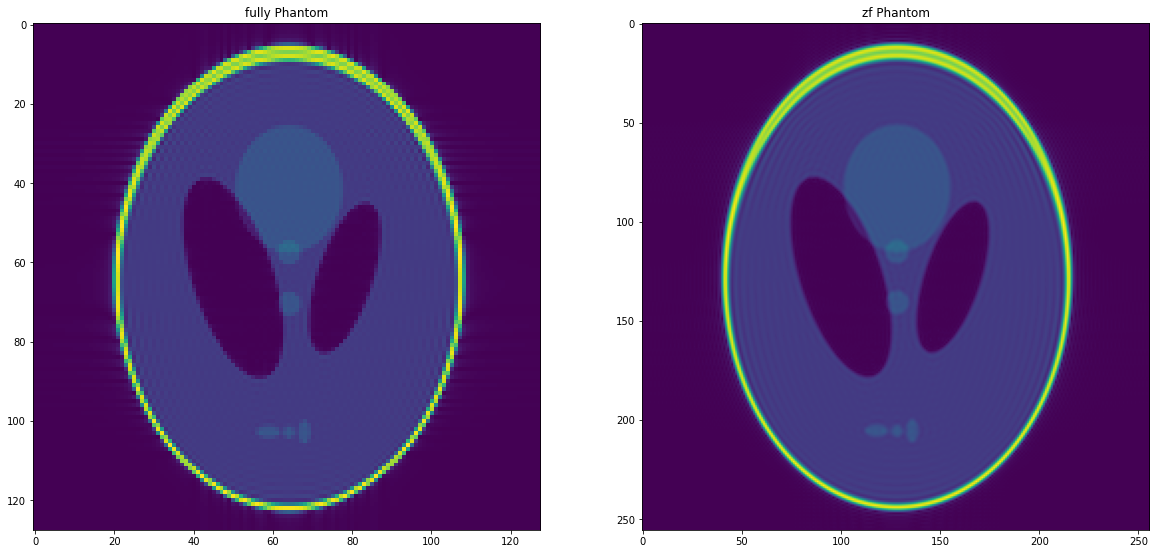

In [88]:
shepp_kspace_zf = np.zeros((256,256),dtype=complex)
display(np.shape(shepp_kspace_zf))

shepp_kspace_zf[63:63+128,63:63+128]=shepp_kspace

shepp_fft_zf = bart(1, "fft -i 3", shepp_kspace_zf)


fig, ax = plt.subplots(ncols=1, figsize=(20, 10))
ax.set_title("zf kspace")
ax.imshow(abs(shepp_kspace_zf),vmin=0, vmax=0.001)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully Phantom")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("zf Phantom")
ax[1].imshow(abs(shepp_fft_zf))

# Sous-echantillonage